In [18]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import itertools
import re
%matplotlib inline

# Multiple Linear logistic Regression code
##### Student name: Yang Liying
##### Student ID: 2109853M-IM20-0015
##### This code includes multiple linear logistic regression code. (Question5)

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')
train_data = newsgroups_train.data  # getting all trainign examples
train_labels = newsgroups_train.target

In [3]:
len(train_data)

11314

In [4]:
len(train_labels)

11314

In [5]:
newsgroups_test = fetch_20newsgroups(subset='test')  # loading test data
test_data = newsgroups_test.data  # get test set examples
test_labels = newsgroups_test.target

In [6]:
len(test_data)

7532

In [7]:
len(test_labels)

7532

In [10]:
tfidf = TfidfVectorizer(max_df=0.97, min_df=2,
                                max_features=None,
                                stop_words='english')
fit_train = tfidf.fit_transform(train_data)
train_tf = tfidf.transform(train_data)
test_tf = tfidf.transform(test_data)

In [11]:
train_tf.shape

(11314, 56124)

In [12]:
test_tf.shape

(7532, 56124)

In [13]:
logistic = LogisticRegression(solver = "saga", multi_class="multinomial", penalty='l1', max_iter=1000, random_state=1)

In [14]:
logistic.fit(train_tf, train_labels)

LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   random_state=1, solver='saga')

In [15]:
predict = logistic.predict(test_tf)

In [16]:
accuracy = np.sum(predict == test_labels) / test_labels.shape[0]

## Test result(accuracy)

In [17]:
accuracy

0.7433616569304302

## Confusion matrix

In [19]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.PuBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Ground Truth')
    plt.xlabel('Prediction')
    plt.tight_layout()

[[0.65 0.02 0.   0.   0.01 0.   0.01 0.   0.01 0.02 0.   0.   0.01 0.03
  0.03 0.1  0.   0.02 0.   0.1 ]
 [0.   0.72 0.04 0.03 0.02 0.06 0.02 0.01 0.   0.01 0.   0.01 0.05 0.01
  0.01 0.   0.   0.   0.01 0.  ]
 [0.   0.06 0.67 0.12 0.04 0.02 0.02 0.01 0.   0.01 0.   0.01 0.03 0.01
  0.01 0.   0.   0.01 0.01 0.  ]
 [0.   0.04 0.07 0.68 0.05 0.01 0.03 0.01 0.   0.   0.01 0.   0.1  0.
  0.01 0.   0.   0.   0.   0.  ]
 [0.   0.01 0.02 0.12 0.71 0.   0.02 0.   0.   0.   0.01 0.   0.06 0.01
  0.01 0.   0.   0.   0.01 0.  ]
 [0.   0.12 0.12 0.02 0.02 0.64 0.   0.   0.   0.01 0.   0.   0.03 0.01
  0.02 0.   0.   0.   0.   0.  ]
 [0.   0.01 0.01 0.06 0.03 0.   0.79 0.03 0.   0.01 0.01 0.   0.03 0.
  0.01 0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.01 0.02 0.01 0.03 0.79 0.02 0.01 0.   0.   0.07 0.01
  0.01 0.   0.02 0.   0.01 0.  ]
 [0.01 0.   0.   0.01 0.   0.   0.01 0.04 0.87 0.   0.   0.   0.02 0.01
  0.   0.   0.01 0.   0.02 0.  ]
 [0.   0.01 0.   0.01 0.01 0.01 0.02 0.01 0.   0.84 0.05 0.

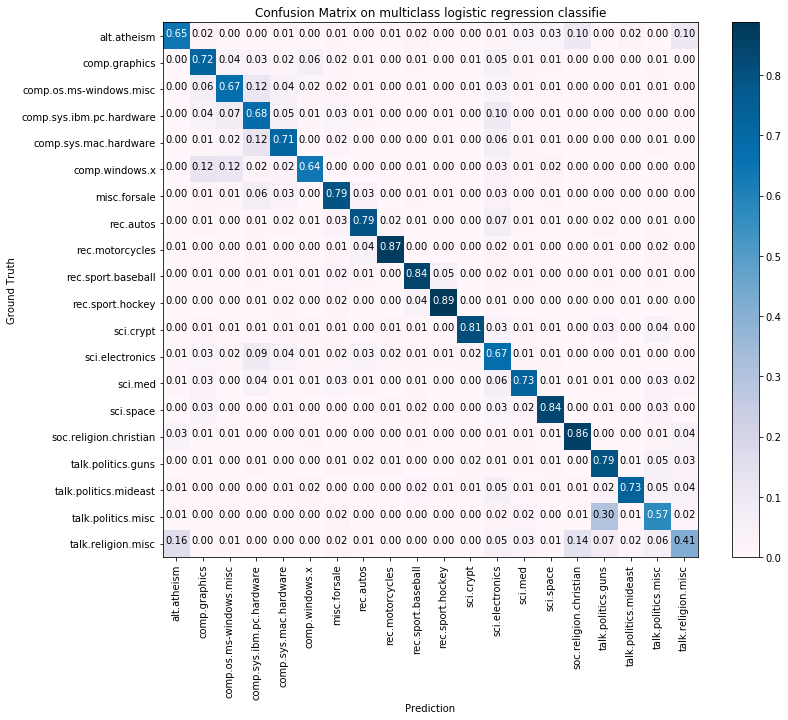

In [20]:
# Compute confusion matrix
cma = confusion_matrix(test_labels, predict, labels=None, sample_weight=None)
# cnf_matrix = confusion_matrix(test_label, predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 10), facecolor='w', edgecolor='b')
plot_confusion_matrix(cma, classes=newsgroups_test.target_names,
                      title='Confusion Matrix on multiclass logistic regression classifie')
plt.savefig('LG.png')